# Тема проекта "Исследование данных о киберспортсменах тир 1-3 сцены по игре Counter-Strike "

# Описание проекта

#### Данный датасет содержащит информацию о киберспортсменах, включает в себя набор данных обо всех игроках, сыгравших минимум 100 матчей на 1-3 уровне про-сцены дисциплины по Counter-strike. Содержит информацию по:
* Команде
* Стране
* Имени
* Сыгранных итого матчах(карт) за разные команды
* Сыгранных итого раундов за разные команды
* Значению убито - умер
* Коэффиценту убил/умер
* Индивидуальному рейтингу игрока (adr_rating)
#### На основании исследования и анализа можно будет:
* Для фанатов или аналитиков: проводить анализ над определенными игроками, для оценки перспективности роста карьеры, или напротив, угасания
* Для инвесторов: выбрать игроков, в автографы которых можно вложиться для получения максимальной выгоды, которая зависит напрямую от активности игрока в сезонах, шоуматчах, про-сцене
* Для команд, спонсоров или компаний: поиск максимально эффективного колла для своей цели

# Цели и задачи проекта

#### __Цели проекта:__ Получить навыки для аналитической работы с датасетами
__Задачи проекта:__ 
* Изучить данные об игроках, выступавших на про сцене;
* Провести анализ игровых характеристик игроков;
* Выявить корреляцию между различными показателями.

# 1. Предобработка данных

## 1.1 Загрузка файла с данными и изучение общей информации

### Библиотеки: 

In [35]:
import pandas as pd #Для работы с датасетами
import matplotlib.pyplot as plt #Для работы с датафреймами и 3-им разделом
import seaborn as sea #Тоже для работы с датафреймами и 3-им разделом

In [48]:
df = pd.read_csv('player_stats.csv') #Чтение датасета
df #Вывод

,Unnamed: 0,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


In [46]:
#Изучение общей информации о датафрейме, структуры данных
print(df.info()) #Просмотр информации, тут можно определить есть ли пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        1869 non-null   int64  
 1   name          1869 non-null   object 
 2   country       1869 non-null   object 
 3   teams         1869 non-null   object 
 4   total_maps    1869 non-null   int64  
 5   total_rounds  1869 non-null   int64  
 6   kd_diff       1869 non-null   int64  
 7   kd            1869 non-null   float64
 8   rating        1869 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 131.5+ KB
None


In [45]:
df.head(10) #Первые строки

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
9,9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


In [44]:
df.tail(10) #Последние строки

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1859,1859,OCEAN,Canada,"['subtLe', 'SKDC', 'Splyce']",410,10602,-1962,0.74,0.77
1860,1860,jakem,United Kingdom,"['exceL', 'CAZ', 'Reason']",114,2941,-580,0.73,0.77
1861,1861,benq1,Slovakia,['eSuba'],196,5070,-954,0.73,0.77
1862,1862,vanilla,Australia,"['munyanyo', 'Jade', 'Incept', 'anime savants'...",118,2910,-607,0.73,0.77
1863,1863,MILENK0,Bulgaria,"['TTFU', 'MK', 'Above the Rest', 'Wrecking', '...",119,3178,-665,0.73,0.76
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70
1868,1868,OverDrive,Russia,"['Nostalgie', 'tomorrow will be better']",132,3364,-908,0.63,0.68


In [43]:
df.sample(10) #Случайные строки

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
943,943,Rustun,United States,"['LFAO', 'Vireo.pro', 'Most Wanted']",113,2941,-41,0.98,0.98
44,44,oskar,Czech Republic,"['Sinners', 'mousesports', 'HellRaisers']",1347,35564,4509,1.20,1.13
1003,1003,donQ,Spain,"['Movistar Riders', 'KPI', 'Epsilon', 'k1ck']",344,8975,-13,1.00,0.98
706,706,rate,Mongolia,"['Renewal', 'D13']",241,6311,78,1.02,1.01
1620,1620,Will1,Brazil,"['Falkol', 'WePlayGames', 'EOX']",133,3485,-262,0.89,0.90
1482,1482,Astroo,United Kingdom,"['Fierce', 'Wind and Rain', 'London', 'CeX']",185,4796,-236,0.93,0.93
946,946,AdreN,Kazakhstan,"['K23', 'K23', 'Gambit', 'HellRaisers']",1745,45903,-175,0.99,0.98
1802,1802,gob b,Germany,"['BIG', 'BIG', 'mousesports', 'NRG']",975,25707,-2811,0.84,0.85
359,359,Gospadarov,Russia,"['NAVI Junior', 'Quantum Bellator Fire']",310,8323,550,1.11,1.05
13,13,fxy0,France,"['Epsilon', 'Millenium']",186,4859,784,1.25,1.17


### **Выводы**

1. В датафрейме **1868 строк(записей), 9 столбцов**.
2. **Отсутствуют** пропущенные значения.
4. Типы данных, находящиеся в таблице, **полностью соответствуют** названию столбов.
5. В столбце __"name"__ теоретически не могут быть дубликаты, тк имена спортсменов уникальны, поэтому нужно это нужно проверить.
6. Названия столбцов (кроме первого) соответствуют __змеиному регистру__.

In [49]:
df.rename(columns = {'Unnamed: 0' : 'number'}, inplace = True) #Переименование первого столбца
df                                                            #и сразу приведение к змеиному регистру

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


## 1.2. Изучение пропущенных значений

In [61]:
missing = df[df['number'].isna() == True] #Все вариации 
missing = df[df['name'].isna() == True]
missing = df[df['country'].isna() == True]
missing = df[df['teams'].isna() == True]
missing = df[df['total_maps'].isna() == True]
missing = df[df['total_rounds'].isna() == True]
missing = df[df['kd_diff'].isna() == True]
missing = df[df['kd'].isna() == True]
missing = df[df['rating'].isna() == True]
missing.drop([], axis = 1)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating


## 1.3. Изменение типов данных

In [91]:
df['number'] = df['number'].astype('int64') #Нам это не надо, но пусть будет скелет,
df                                        #типо то, что я понимаю наглядно
#df.dtypes чекнуть если что

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70


## 1.4. Поиск дубликатов

In [96]:
print("Количество дублирующихся строчек: ", df.duplicated().sum())

Количество дублирующихся строчек:  0


## 1.5. Выводы к разделу 1

1. Столбцы были приведены к __змеиному регистру__.
2. Проведена проверка на пропущенные значения(их нет).
3. __Типы данных__ в норме, было показано как их изменить в обратной ситуации.
4. __Дубликаты__ не были найдены.

# 2. Исследовательский анализ данных

## 2.1. Индексация (по координатам, логическая)

In [106]:
df.loc[0:9,:] #Первые 10 строк(записей)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy'...",702,18010,3532,1.33,1.19
9,9,d4v41,Malaysia,"['BOOT', 'FrostFire', 'Fire Dragoon', 'BOOT-d[...",308,8005,1358,1.27,1.18


In [103]:
df.loc[10::3,:] #Выбор каждой третьей, начиная с 11-ой

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
10,10,smooya,United Kingdom,"['BIG', 'BIG', 'Movistar Riders', 'Epsilon']",737,19476,3163,1.26,1.18
13,13,fxy0,France,"['Epsilon', 'Millenium']",186,4859,784,1.25,1.17
16,16,Woro2k,Ukraine,"['MAD Lions', 'forZe', 'HauntedFamily']",129,3485,511,1.22,1.17
19,19,SENSEi,Ukraine,"['Akuma', 'CR4ZY', 'Project X']",341,8975,1669,1.33,1.16
22,22,device,Denmark,"['Astralis', 'TSM']",1733,45159,7005,1.25,1.16
...,...,...,...,...,...,...,...,...,...
1855,1855,DuDe,Germany,"['ALTERNATE aTTaX', 'PANTHERS']",303,8063,-1464,0.74,0.78
1858,1858,HaRts,France,"['Clan-Mystik', 'Millenium']",116,2993,-506,0.74,0.77
1861,1861,benq1,Slovakia,['eSuba'],196,5070,-954,0.73,0.77
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74


In [104]:
df.loc[df.index[-10:], :] #Выбор последних 10 записей

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1859,1859,OCEAN,Canada,"['subtLe', 'SKDC', 'Splyce']",410,10602,-1962,0.74,0.77
1860,1860,jakem,United Kingdom,"['exceL', 'CAZ', 'Reason']",114,2941,-580,0.73,0.77
1861,1861,benq1,Slovakia,['eSuba'],196,5070,-954,0.73,0.77
1862,1862,vanilla,Australia,"['munyanyo', 'Jade', 'Incept', 'anime savants'...",118,2910,-607,0.73,0.77
1863,1863,MILENK0,Bulgaria,"['TTFU', 'MK', 'Above the Rest', 'Wrecking', '...",119,3178,-665,0.73,0.76
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70
1868,1868,OverDrive,Russia,"['Nostalgie', 'tomorrow will be better']",132,3364,-908,0.63,0.68


In [111]:
df.loc[0:49, ['name', 'rating']] #С 0 по 49 столбцов 'name' и 'age'
#Проще говоря топ 50 лучших игроков по adr_rating

,name,rating
0,ZywOo,1.28
1,s1mple,1.25
2,deko,1.24
3,saffee,1.24
4,sh1ro,1.22
5,m0NESY,1.21
6,Kaze,1.20
7,degster,1.19
8,sterling,1.19
9,d4v41,1.18


In [113]:
df[df['rating'] >= 1] #Вывод потенциально сильных игроков (у которых rating >=1)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
...,...,...,...,...,...,...,...,...,...
832,832,SIXER,France,"['LDLC', 'LDLC', 'Envy']",966,25460,737,1.05,1.00
833,833,xelos,Sweden,"['Lemondogs', 'Epsilon', 'AliGon']",419,11082,28,1.00,1.00
834,834,STYKO,Slovakia,"['HellRaisers', 'mousesports', 'GODSENT']",1389,36601,314,1.01,1.00
835,835,freakazoid,United States,"['Swole Patrol', 'Cloud9', 'Echo Fox']",868,22265,18,1.00,1.00


In [119]:
df[(df['country'] == 'Russia') & (df['rating'] >= 1)] #Вывод потенциально сильных 
                                                    #игроков из России (у которых rating >=1)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
7,7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
39,39,Jame,Russia,"['Virtus.pro', 'AVANGAR']",1065,28226,4765,1.30,1.14
40,40,El1an,Russia,"['Entropiq', 'Winstrike', 'EPG']",1046,27968,3977,1.23,1.14
60,60,xsepower,Russia,['forZe'],1061,28504,4168,1.25,1.12
69,69,liTTle,Russia,"['forZe', 'RuSh3D', 'Spartak', 'Enso']",458,12159,1550,1.20,1.12
89,89,FpSSS,Russia,"['GROND', 'No Org']",102,2720,322,1.19,1.11
98,98,zorte,Russia,"['forZe', 'Unique', 'ex-ETHEREAL']",518,13789,1650,1.19,1.11


In [122]:
df[(df['country'] == 'Russia')] #118 профессиональных Российских киберспортсменов есть на про сцене CS

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
7,7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
39,39,Jame,Russia,"['Virtus.pro', 'AVANGAR']",1065,28226,4765,1.30,1.14
...,...,...,...,...,...,...,...,...,...
1807,1807,Art1st,Russia,"['5balls', 'SG.pro']",126,3304,-431,0.82,0.85
1821,1821,PASHANOJ,Russia,"['Unique', 'ex-ETHEREAL']",588,15386,-2182,0.80,0.84
1842,1842,Heyz1ng,Russia,"[""eL'quvet"", 'Hard4U', 'forZe']",114,2951,-504,0.78,0.81
1853,1853,RuFire,Russia,"['VP.Prodigy', 'SG.pro', '5balls']",351,9320,-1720,0.75,0.79


In [120]:
df[df['country'].str.startswith('R')] #Вывод строк(записей), где значение
                                    #столбца 'country' начинается на R

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
7,7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
24,24,cosmeeeN,Romania,"['Epsilon', 'Nexus', 'XPC']",319,8310,1109,1.20,1.16
...,...,...,...,...,...,...,...,...,...
1807,1807,Art1st,Russia,"['5balls', 'SG.pro']",126,3304,-431,0.82,0.85
1821,1821,PASHANOJ,Russia,"['Unique', 'ex-ETHEREAL']",588,15386,-2182,0.80,0.84
1842,1842,Heyz1ng,Russia,"[""eL'quvet"", 'Hard4U', 'forZe']",114,2951,-504,0.78,0.81
1853,1853,RuFire,Russia,"['VP.Prodigy', 'SG.pro', '5balls']",351,9320,-1720,0.75,0.79


## 2.2. Сортировка данных

In [129]:
df.sort_values(by = 'rating', ascending = False).head(5) #Сортировка по рейтингу первых 5 игркоов (от большего к меньшему)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22


In [134]:
df.sort_values(by = 'rating', ascending = True).tail(5) #Сортировка по рейтингу первых 5 игркоов (от меньшего к большему)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
4,4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
3,3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
2,2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
1,1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
0,0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28


In [137]:
df.sort_values(by = 'rating', ascending = True).head(5) #Сортировка по рейтингу последних 5 игркоов (от меньшего к большему)

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
1868,1868,OverDrive,Russia,"['Nostalgie', 'tomorrow will be better']",132,3364,-908,0.63,0.68
1867,1867,frgd,Indonesia,['nxl'],130,3196,-822,0.65,0.70
1866,1866,breaker,Australia,"['munyanyo', 'seadoggs', 'Rooster']",132,3160,-749,0.69,0.73
1865,1865,valens,United States,"['Complexity', 'Complexity', 'Nihilum', 'ImPer...",251,6594,-1459,0.69,0.74
1864,1864,SPAMMER,United States,"['Variance', 'Rap Gang', 'Levitate', 'Under 21']",135,3458,-756,0.70,0.74


## 2.3. Фильтрация данных

In [139]:
players = df.query('country == "Russia" and rating >= 0.8 and rating <= 1')[['name', 'country', 'teams', 'total_maps', 'total_rounds', 'kd_diff', 'kd', 'rating']]
players #Фильтрация с использованием метода ".query". Искали Страна = Россия, рейтинг = [0.8-1]
#Проще говоря из них можно собрать дефолт тир 2-3 команду, зависит от коллов и от формы

,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
746,SP1NT,Russia,"[""eL'quvet"", 'Mustang Crew']",150,4007,39,1.01,1.00
758,tricky,Russia,"['Trident', 'Trident', 'Cyber Legacy', 'Espada']",261,6839,111,1.02,1.00
761,fenvicious,Russia,"['Unique', 'Spirit Academy', 'Spirit Academy',...",729,19059,141,1.01,1.00
770,almazer,Russia,['forZe'],1268,34119,623,1.03,1.00
772,1uke,Russia,"['Spirit Academy', 'Spirit Academy', 'HOLLYWOO...",623,16179,223,1.02,1.00
...,...,...,...,...,...,...,...,...
1771,mouseTT,Russia,"['Kungar', 'USSR', 'RuSh3D']",142,3622,-403,0.84,0.87
1786,zoneR,Russia,"['Enso', 'GGWP', '97club', 'TEAMSWAGYOLO']",102,2735,-319,0.84,0.86
1807,Art1st,Russia,"['5balls', 'SG.pro']",126,3304,-431,0.82,0.85
1821,PASHANOJ,Russia,"['Unique', 'ex-ETHEREAL']",588,15386,-2182,0.80,0.84


In [142]:
players = df.where((df['country'] == "Russia") & (df['rating'] > 1))
players = players.dropna() #Фильтрация с использованием метода ".where" Столбец = Россия, рейтинг от 1.01
players #Вот здесь собраны сильнейшие киберспортсмены из России по данным HLTV

,number,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
2,2.0,deko,Russia,['1WIN'],190.0,5096.0,1250.0,1.42,1.24
4,4.0,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744.0,19780.0,4593.0,1.43,1.22
5,5.0,m0NESY,Russia,['NAVI Junior'],144.0,3687.0,709.0,1.31,1.21
7,7.0,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555.0,14868.0,2745.0,1.31,1.19
39,39.0,Jame,Russia,"['Virtus.pro', 'AVANGAR']",1065.0,28226.0,4765.0,1.30,1.14
40,40.0,El1an,Russia,"['Entropiq', 'Winstrike', 'EPG']",1046.0,27968.0,3977.0,1.23,1.14
60,60.0,xsepower,Russia,['forZe'],1061.0,28504.0,4168.0,1.25,1.12
69,69.0,liTTle,Russia,"['forZe', 'RuSh3D', 'Spartak', 'Enso']",458.0,12159.0,1550.0,1.20,1.12
89,89.0,FpSSS,Russia,"['GROND', 'No Org']",102.0,2720.0,322.0,1.19,1.11
98,98.0,zorte,Russia,"['forZe', 'Unique', 'ex-ETHEREAL']",518.0,13789.0,1650.0,1.19,1.11


## 2.4. Сводные таблицы

In [151]:
table = df.pivot_table(values='rating', index='country', aggfunc='mean') #Cредний adr_rating по странам
table

,rating
country,
Albania,0.990000
Argentina,0.990667
Australia,0.980896
Austria,0.990000
Azerbaijan,0.920000
...,...
United Kingdom,0.963030
United States,0.980931
Uruguay,1.005000


In [153]:
country = df.pivot_table(values='total_maps', index='country', aggfunc='sum')
country #Общее количество сыгранных карт киберспортсменами по странам

,total_maps
country,
Albania,1246
Argentina,7845
Australia,44553
Austria,144
Azerbaijan,366
...,...
United Kingdom,10766
United States,76918
Uruguay,1091


## 2.5. Группировка данных, агрегатные функции

In [163]:
grouped_stats = df.groupby('country').agg({ #Аргументом является страна
    'total_maps': ['sum', 'mean', 'min', 'max'], #4 значения в тотал мапс
    'total_rounds': ['sum', 'mean', 'min', 'max'], #4 значения в тотал раундс
    'rating': ['sum', 'mean', 'min', 'max'] #4 значения в адр_рейтинг
})
grouped_stats

total_maps                        total_rounds                \
                      sum        mean  min   max          sum          mean   
country                                                                       
Albania              1246  249.200000  122   429        33099   6619.800000   
Argentina            7845  261.500000  102   683       203205   6773.500000   
Australia           44553  332.485075  100  1144      1145779   8550.589552   
Austria               144  144.000000  144   144         3885   3885.000000   
Azerbaijan            366  366.000000  366   366         9581   9581.000000   
...                   ...         ...  ...   ...          ...           ...   
United Kingdom      10766  326.242424  103  1352       282743   8567.969697   
United States       76918  377.049020  100  1476      2001797   9812.730392   
Uruguay              1091  272.750000  190   420        28554   7138.500000   
Uzbekistan            719  719.000000  719   719        19295  19295.000000   
Vietnam              1025  146.428571  101   184        25587   3655.285714   

                              rating                        
                  min    max     sum      mean   min   max  
country                                                     
Albania          3193  11522    4.95  0.990000  0.89  1.11  
Argentina        2563  17834   29.72  0.990667  0.86  1.16  
Australia        2348  29891  131.44  0.980896  0.73  1.14  
Austria          3885   3885    0.99  0.990000  0.99  0.99  
Azerbaijan       9581   9581    0.92  0.920000  0.92  0.92  
...               ...    ...     ...       ...   ...   ...  
United Kingdom   2528  35371   31.78  0.963030  0.77  1.18  
United States    2602  38669  200.11  0.980931  0.74  1.12  
Uruguay          4953  11037    4.02  1.005000  0.94  1.09  
Uzbekistan      19295  19295    0.92  0.920000  0.92  0.92  
Vietnam          2648   4594    6.79  0.970000  0.88  1.11  

[72 rows x 12 columns]

## 2.6. Поиск закономерностей, варианты решения бизнес-задачи

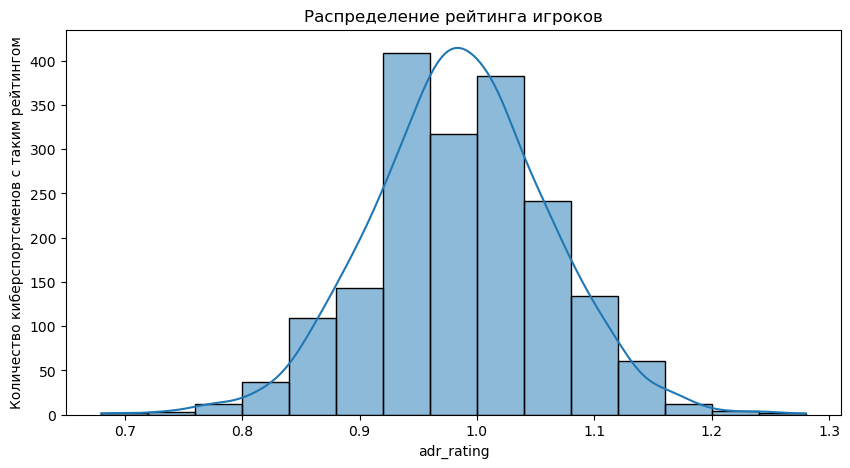

In [174]:
plt.figure(figsize=(10, 5)) #Размерность
sea.histplot(df['rating'], bins=15, kde=True) #Аргумент
plt.title('Распределение рейтинга игроков')
plt.xlabel('adr_rating') #Подпись строк и столбцов, сноски
plt.ylabel('Количество киберспортсменов с таким рейтингом')
plt.show()

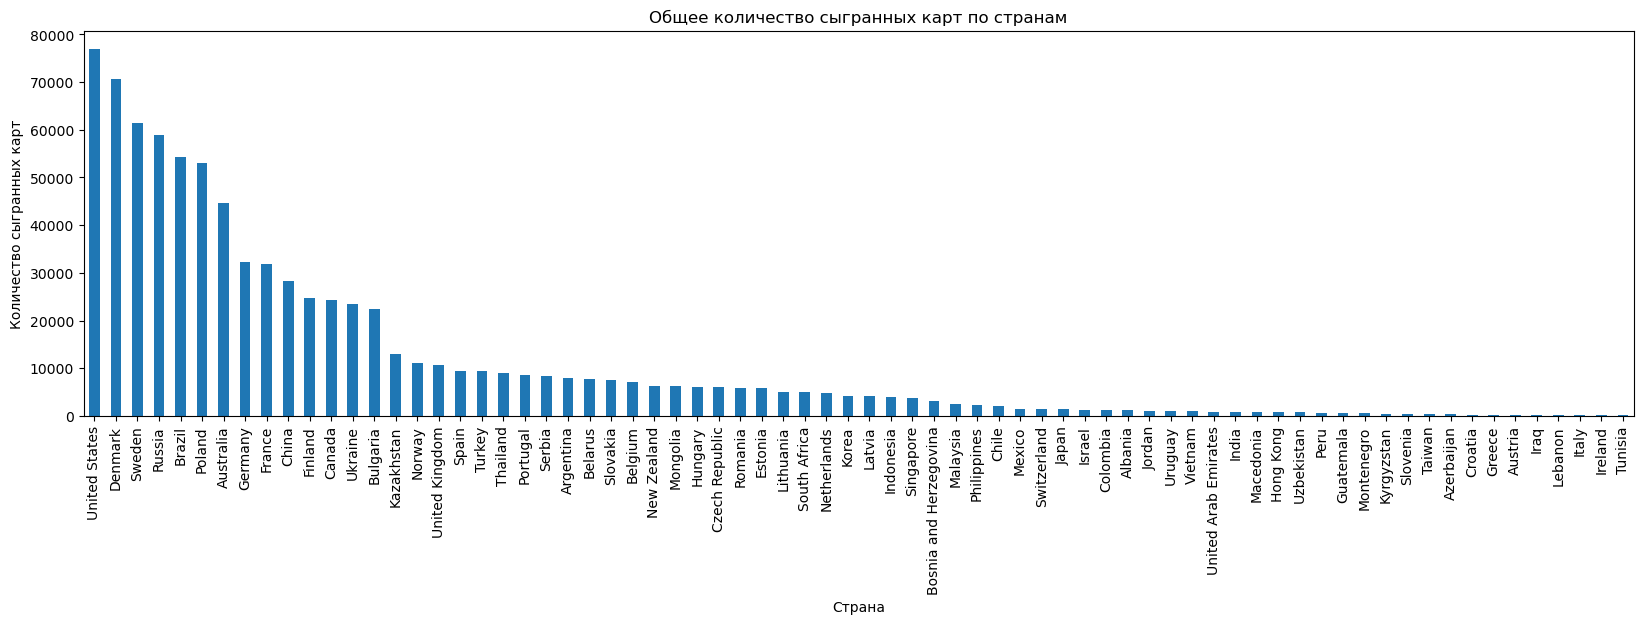

In [170]:
plt.figure(figsize=(20, 5))
df.groupby('country')['total_maps'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Общее количество сыгранных карт по странам')
plt.xlabel('Страна')
plt.ylabel('Количество сыгранных карт')
plt.show()

## 2.7. Выводы к разделу 2

1. Логическая индексация и индексация по координатам:
* Использовано несколько подходов к индексации, что позволило выделить ключевые данные по различным условиям. Логическая индексация помогла эффективно фильтровать данные на основе заданных критериев.
2. Сортировка данных и анализ наибольших и наименьших значений:
* Данные были отсортированы по различным столбцам, включая adr_rating про-игроков. Здесь мы выяснили что наилучший adr_rating среди всех киберспортсменов равен 1.28. __Лучший игрок: француз ZywOo. Худший игрок с наихудшим adr_rating -ом: Россиянин OverDrive.__
3.  Фильтрация данных:
* Были применены методы фильтрации, такие как метод __query()__ и оператор __where()__, для выделения  данных.
4. Сводные таблицы:
* Построенные сводные таблицы дали возможность анализа данных.
5. Группировка данных и агрегатные функции:
* Данные были сгруппированы по одному из ключевых столбцов(стране), затем для каждой группы __были вычислены суммарные, средние, минимальные и максимальные значения сыгранных всего карт, раундов и рейтинга.__
6. Поиск закономерностей, варианты решения бизнес-задачи:
* Согласно диаграмме распределения рейтинга игроков можем сделать вывод, что __большинство игроков не достигает даже стандартного уровня игры (adr_rating <1).__
* Больше всего карт сыграли __Американцы__, они имеют весомый отрыв в опыте на про сценах..

# 3.0. Графический анализ данных

## 3.1. Диаграммы, библиотека Matplotlib
Распределение adr_rating дает нам понять, что большинство игроков имеет рейтинг < 1. 

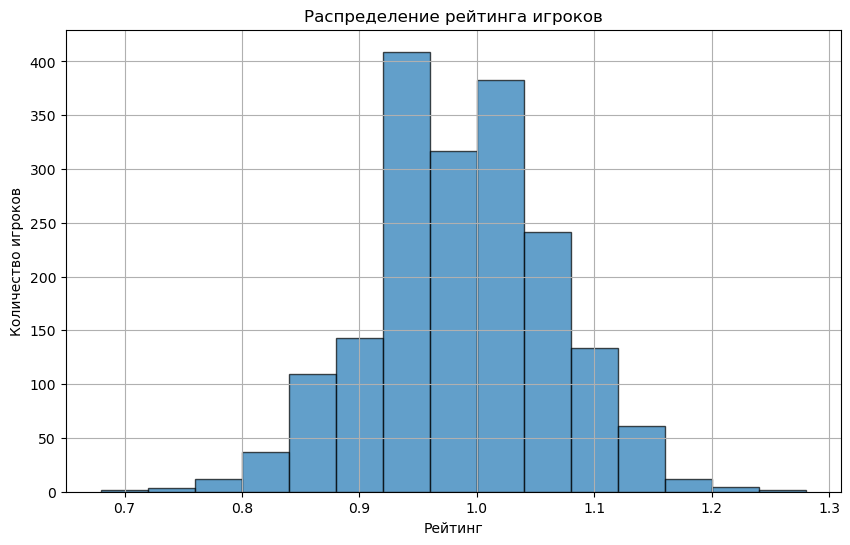

In [175]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Распределение рейтинга игроков')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игроков')
plt.grid(True)
plt.show()

## 3.2. Диаграммы, библиотека Seaborn

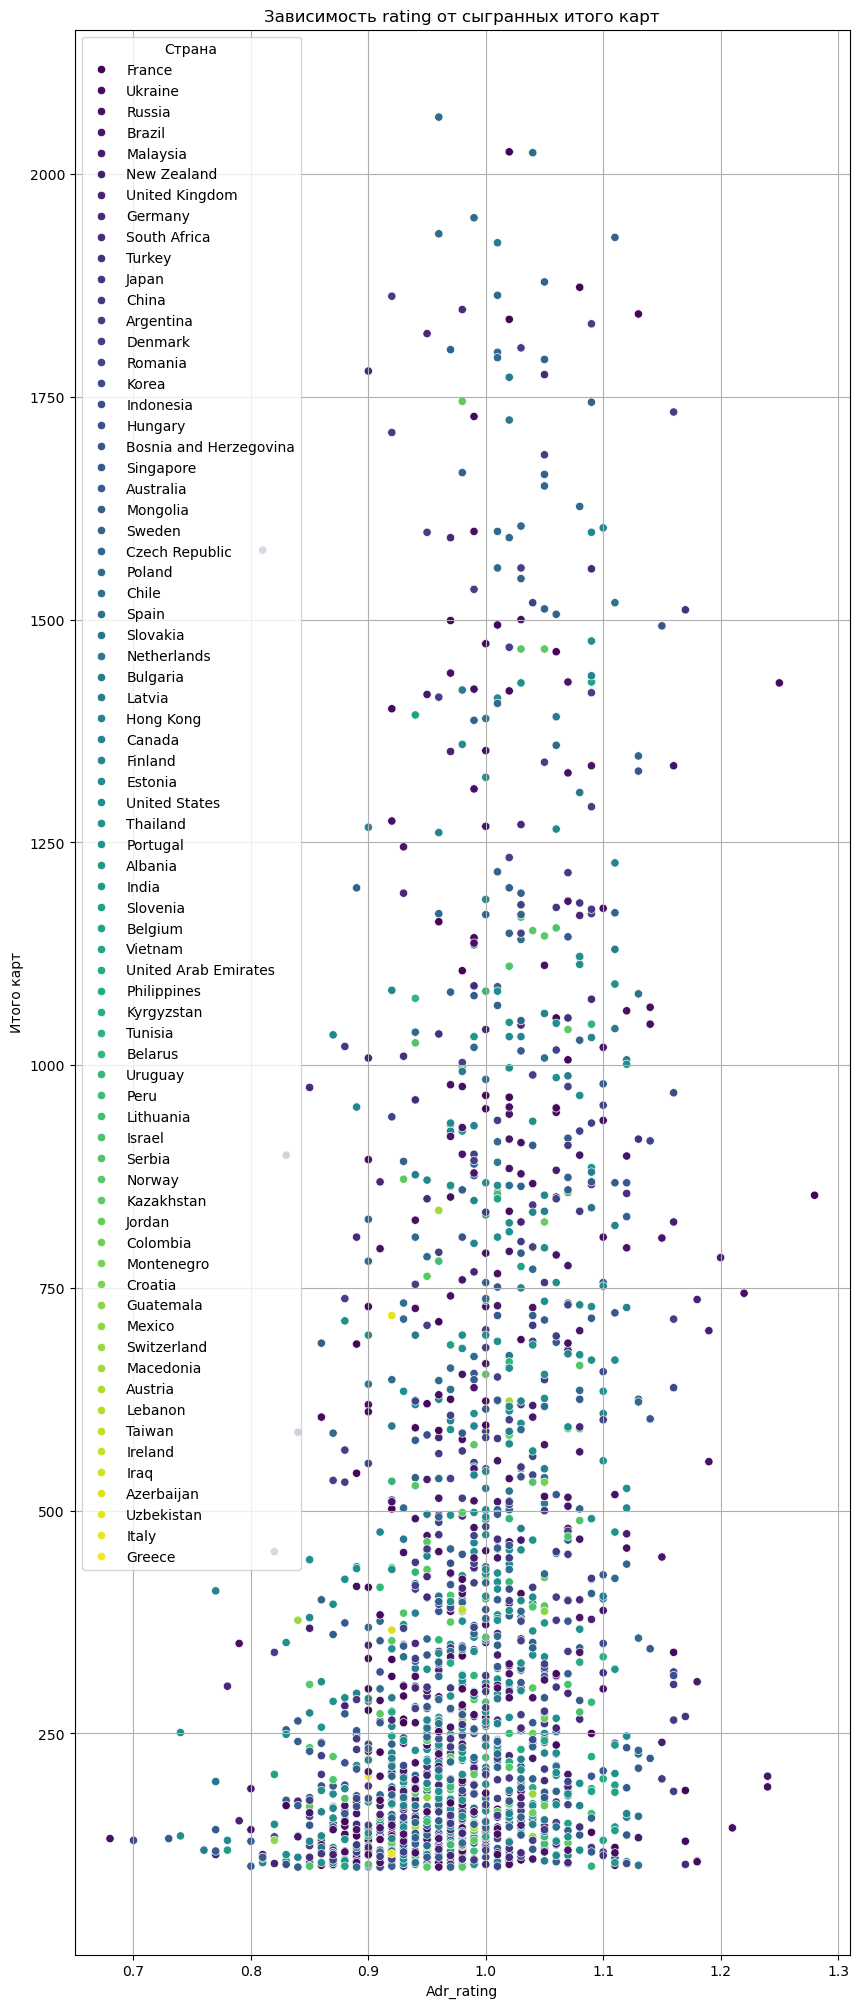

In [180]:
plt.figure(figsize=(10, 25))
sea.scatterplot(x='rating', y='total_maps', data=df, hue='country', palette='viridis')
plt.title('Зависимость rating от сыгранных итого карт')
plt.xlabel('Adr_rating')
plt.ylabel('Итого карт')
plt.legend(title='Страна')
plt.grid(True)
plt.show()

## 3.3. "Портрет" типичного потребителя (вывод к разделу 3)

## На основе графического анализа можно выделить следующие характеристики стандартного киберспортсмена:
#### Происхождение:
* В основном стандартный киберспортсмен будет выходцем ЕС или стран СНГ
#### Adr_rating:
* Средний рейтинг простого киберспортсмена равен от 0.9 до 1.1. Лишь меньшая часть киберспортсменов достигает рейтинга > 1.1
#### Итого сыгранных карт
* Рекордсменами по сыгранным картам являются Французы, Украинцы, Россияне, Бразильцы, Американцы. Средний диапазон карт среди всех киберспортсменов варьируется от 100 до 1000 карт за карьеру. Также в основном чем меньше карт сыграно, тем больше adr_rating 

# Общий вывод по проекту

#### Что было достигнуто по мере выполнения проекта:
* Получено огромное количества опыта и полезных навыков работы с датасетами используя датафреймы пандаса и некоторые диаграммы.
* Частично был проведен анализ Спортсменов из России, чтобы было понимание за какими отечественными игроками можно понаблюдать, в кого то инвестировать, и в целом имеется понимание того, что киберспорт в России возможен.
* Спонсоры, партнеры могут смотреть динамику развития каждого игрока и подумать о том, чтобы заключить контракт с ним.
* Инвесторы могут понимать, какие автографы будут дальше пользоваться спросом, который зависит от игры киберспортсмена.
* Фанаты могут найти себе другого "идола", или посмотреть стиль игры лучших из списка, возможно получить прочие практические навыки.
* Также в рамках проекта были достигнуты и выполнены все поставленные цели и задачи, связанные с анализом данных киберспортсменов дисциплины CS. Наглядно были изучены собранные данные. В результате была выявлена кореляция, которая позволяла понять факторы, определяющие перспективность игрока. Этот опыт предоставил практические навыки в работе над аналитическими кейсами и показал важность комплексного подхода к аналитике.